In [21]:
import geopandas as gpd
import pandas as pd
import rasterio as rio
from rasterio.plot import show
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns

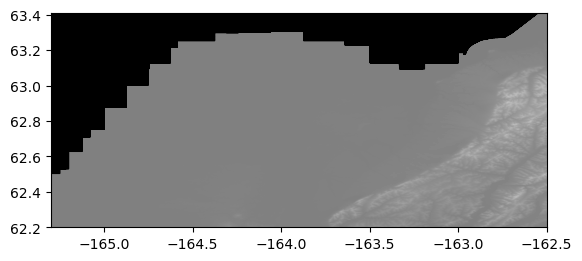

<Axes: >

In [10]:
#import YkDelta Elevation
ELEV = rio.open("Data/10m_elevation.tif")
show(ELEV,cmap = 'gray',vmin=-1000,vmax=1000)

In [5]:
#transfer to panda array 
ELEV_arr = ELEV.read(1)
ELEV_arr

array([[-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00],
       ...,
       [ 1.6741672e+00,  1.9890444e+00,  1.8639914e+00, ...,
         3.4381191e+01,  3.7083832e+01,  3.9402126e+01],
       [ 1.7348375e+00,  2.2120628e+00,  1.9833454e+00, ...,
         3.5983047e+01,  4.1940426e+01,  4.3592659e+01],
       [ 2.1797762e+00,  1.9198716e+00,  1.9932541e+00, ...,
         3.9712692e+01,  4.5578968e+01,  4.7450466e+01]], dtype=float32)

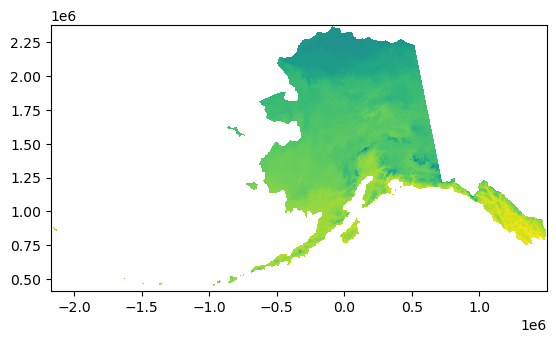

<Axes: >

In [24]:
#import Temperature
Annual_Temp = rio.open("Data/Tavg_annual_historical_AK/Tavg_annual_historical_AK.tif")
show(Annual_Temp)

In [28]:
Annual_Temp.meta

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -3.4028234663852886e+38,
 'width': 4762,
 'height': 2557,
 'count': 1,
 'crs': CRS.from_wkt('PROJCS["NAD_1983_Alaska_Albers",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",50],PARAMETER["longitude_of_center",-154],PARAMETER["standard_parallel_1",55],PARAMETER["standard_parallel_2",65],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'),
 'transform': Affine(771.0, 0.0, -2173225.118142955,
        0.0, -771.0, 2381118.150470569)}

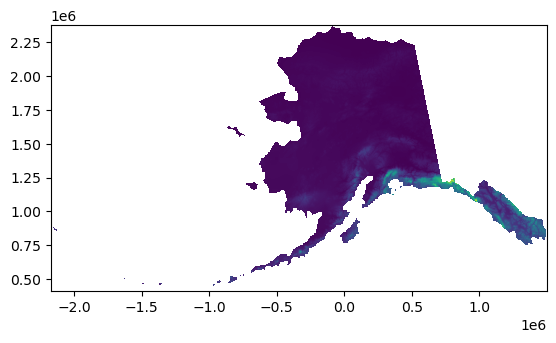

<Axes: >

In [27]:
#import Precipitation 
Annual_Precip= rio.open("Data/Ppt_annual_historical_AK/Ppt_annual_historical_AK.tif")
show(Annual_Precip)

In [19]:
#import wildfire history
points_2020 = gpd.read_file('Data/wildfire_history/AgencyHistoricFirePerimeters_2020/AgecnyHistoricFirePerimeters_2020.shp')
points_2010 = gpd.read_file('Data/wildfire_history/AgencyHistoricFirePerimeters_2010_2019/AgencyHistoricFirePerimeters_2010_2019.shp')
points_2000 = gpd.read_file('Data/wildfire_history/AgencyHistoricFirePerimeters_2000_2009/AgencyHistoricFirePerimeters_2000_2009.shp')
points_1990 = gpd.read_file('Data/wildfire_history/AgencyHistoricFirePerimeters_1990_1999/AgencyHistoricFirePerimeters_1990_1999.shp')
points_1980 = gpd.read_file('Data/wildfire_history/AgencyHistoricFirePerimeters_1980_1989/AgencyHistoricFirePerimeters_1980_1989.shp')
points_earlier = gpd.read_file('Data/wildfire_history/AgencyHistoricFirePerimeters_1979_Earlier/AgencyHistoricFirePerimeters_1979_Earlier.shp')

In [23]:
#combine all wildfire history
wildfire_points = gpd.GeoDataFrame(pd.concat([points_2020,points_2010,points_2000,points_1990,points_1980,points_earlier]))
wildfire_points

,IRWINID,INCIDENT,FIRE_YEAR_,FIRE_YEAR,AGENCY,SOURCE,DATE_CUR,MAP_METHOD,GIS_ACRES,UNQE_FIRE_,LOCAL_NUM,UNIT_ID,POO_RESP_I,FEATURE_CA,COMMENTS,GEO_ID,OOID,OBJECTID,geometry
0,None,NELSON,2020.0,2020,CDF,CalFire FRAP,20200623,GPS Ground,109.602501,None,00013212,CANEU,None,Wildfire,None,1,21440.0,1.0,"POLYGON ((-121.34840 38.88999, -121.34835 38.8..."
1,None,AMORUSO,2020.0,2020,CDF,CalFire FRAP,20200604,GPS Ground,685.585022,None,00011799,CANEU,None,Wildfire,None,2,21441.0,2.0,"POLYGON ((-121.35275 38.82038, -121.35267 38.8..."
2,None,ATHENS,2020.0,2020,CDF,CalFire FRAP,20200301,GPS Ground,27.300480,None,00018493,CANEU,None,Wildfire,None,3,21442.0,3.0,"POLYGON ((-121.33333 38.84558, -121.33311 38.8..."
3,None,FLEMING,2020.0,2020,CDF,CalFire FRAP,20200401,GPS Ground,12.931550,None,00007619,CANEU,None,Wildfire,None,4,21443.0,4.0,"POLYGON ((-121.27317 38.96308, -121.27304 38.9..."
4,None,MELANESE,2020.0,2020,CDF,CalFire FRAP,20200419,GPS Ground,10.315960,None,00008471,CANEU,None,Wildfire,None,5,21444.0,5.0,"POLYGON ((-121.30065 39.48714, -121.30041 39.4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32993,None,None,9999.0,9999,BLM,BLM,201908262211,Unknown,2.215308,9999--000000,None,None,None,Wildfire,None,{1635EF00-EFEF-4D5C-9496-79EBDA13CE62},NaN,NaN,"POLYGON ((-107.07176 38.18160, -107.07154 38.1..."
32994,None,Hawks Nest wildfire 1,1960.0,1960,BLM,BLM,201908261743,Unknown,380.299700,1960--000000,None,None,None,Wildfire,"200 acres, seeded with crested wheat, smooth b...",{3430F7BF-2967-4B13-8963-3EA5574E12FD},NaN,NaN,"MULTIPOLYGON (((-107.41784 38.92830, -107.4184..."
32995,None,Spring Creek wildfire 1,1960.0,1960,BLM,BLM,201908261649,Unknown,155.432000,1960--000000,None,None,None,Wildfire,None,{4136EDF2-950D-49E8-8301-2296BEBCBF00},NaN,NaN,"POLYGON ((-108.63531 38.45563, -108.63543 38.4..."
32996,None,Naturita wildfire 1,1974.0,1974,BLM,BLM,201908261445,Unknown,1777.022600,1974--000000,None,None,None,Wildfire,"2,100 acres aerial seeded and 345 acres drill ...",{41E77CA4-ED17-4FEA-95EC-C8C92F548FB8},NaN,NaN,"POLYGON ((-108.55919 38.19544, -108.55907 38.1..."
